In [96]:
import pandas
import altair as alt
from scipy.optimize import curve_fit
import numpy
import datetime

In [97]:
data = pandas.read_csv("https://covidtracking.com/api/states/daily.csv")
data['date'] =  pandas.to_datetime(data['date'], format='%Y%m%d')
data = data[data['state'] == 'CA'][['date','positive','negative']].sort_values('date')


In [98]:
data['new cases'] = data['positive'].diff()

In [99]:
data

,date,positive,negative,new cases
1080,2020-03-04,53.0,462.0,NaN
1056,2020-03-05,53.0,462.0,0.0
1022,2020-03-06,60.0,462.0,7.0
972,2020-03-07,69.0,462.0,9.0
921,2020-03-08,88.0,462.0,19.0
870,2020-03-09,114.0,690.0,26.0
819,2020-03-10,133.0,690.0,19.0
768,2020-03-11,157.0,916.0,24.0
717,2020-03-12,202.0,916.0,45.0
666,2020-03-13,202.0,916.0,0.0


In [92]:
melted = data.melt('date')

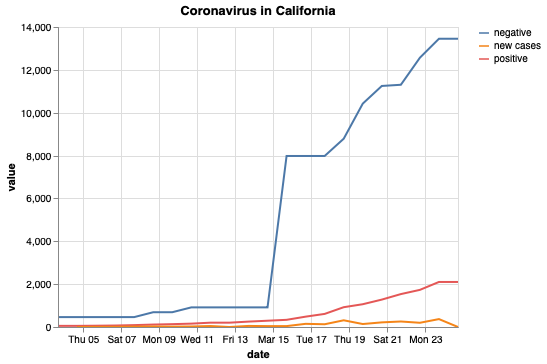

In [93]:
alt.Chart(melted).mark_line().encode(
    x='date',
    y='value',
    color=alt.Color('variable', legend=alt.Legend(title=""))
).properties(
    title='Coronavirus in California'
)

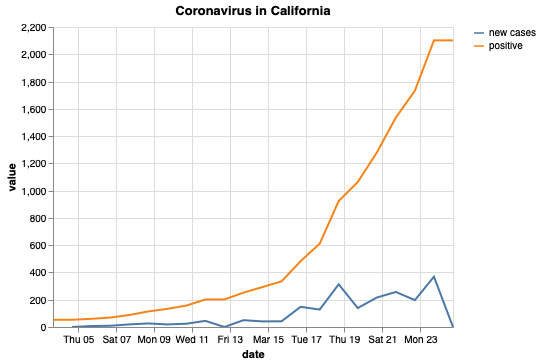

In [94]:
alt.Chart(melted[melted['variable']!='negative']).mark_line().encode(
    x='date',
    y='value',
    color=alt.Color('variable', legend=alt.Legend(title=""))
).properties(
    title='Coronavirus in California'
)

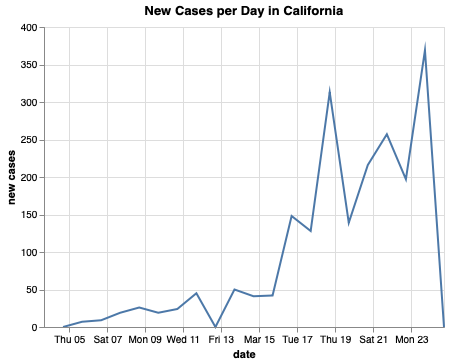

In [95]:
alt.Chart(data).mark_line().encode(
    x='date',
    y='new cases'
).properties(
    title='New Cases per Day in California'
)